In [13]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

In [3]:
og_data = pd.read_csv("fraud_dataset.csv",sep=',')
og_data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
og_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
og_data.isnull().values.any()

False

In [6]:
og_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
og_data.groupby("isFraud")[["nameOrig","nameDest"]].describe()

nameOrig                            nameDest                        \
           count   unique          top freq    count   unique          top   
isFraud                                                                      
0        6354407  6345122   C363736674    3  6354407  2719685  C1286084959   
1           8213     8213  C2020495090    1     8213     8169  C2020337583   

              
        freq  
isFraud       
0        113  
1          2

In [8]:
og_data.groupby(['type','isFraud']).step.count().unstack()

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [9]:
pd.crosstab(og_data.isFraud,og_data.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


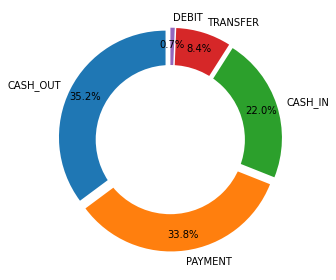

In [10]:
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(og_data.type.value_counts(), labels=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of transactions')

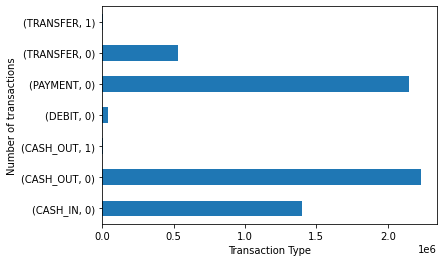

In [11]:
axes = og_data.groupby(['type', 'isFraud']).size().plot(kind='barh')
axes.set_xlabel("Transaction Type")
axes.set_ylabel("Number of transactions")

In [12]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import graphviz

droplist=['isFlaggedFraud','nameDest','nameOrig','step','type']
dummy_data = pd.get_dummies(og_data.loc[og_data.type.apply(lambda x: x in ['CASH_OUT','TRANSFER'])].drop(labels=droplist,axis=1))

X_train, X_test, y_train, y_test = train_test_split(
    dummy_data.drop('isFraud',axis=1), 
    dummy_data.isFraud, 
    test_size = 0.3, 
    random_state=2019, 
    shuffle=False
)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval  = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify configurations as dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 4,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

gbm = lgb.train(params,
            lgb_train,
            num_boost_round=15,
            valid_sets=[lgb_train,lgb_eval],
            valid_names=['train', 'eval'])

[LightGBM] [Info] Number of positive: 3633, number of negative: 1935653
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1939286, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001873 -> initscore=-6.278141
[LightGBM] [Info] Start training from score -6.278141
[1]	train's binary_logloss: 0.00921449	eval's binary_logloss: 0.0213185
[2]	train's binary_logloss: 0.00856816	eval's binary_logloss: 0.0189106
[3]	train's binary_logloss: 0.00807355	eval's binary_logloss: 0.0175273
[4]	train's binary_logloss: 0.00781482	eval's binary_logloss: 0.0168062
[5]	train's binary_logloss: 0.00760714	eval's binary_logloss: 0.0162838
[6]	train's binary_logloss: 0.00741499	eval's binary_logloss: 0.01579
[7]	tra